### Exploratory Data Analysis

,Date,Inflation
0,1989-01-01,0.049
1,1989-02-01,0.050
2,1989-03-01,0.050
3,1989-04-01,0.053
4,1989-05-01,0.053


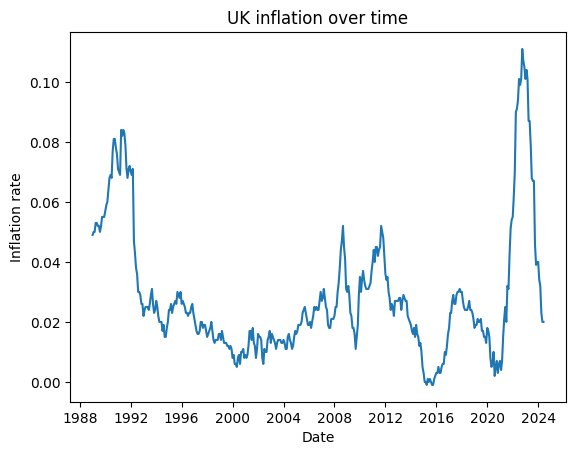

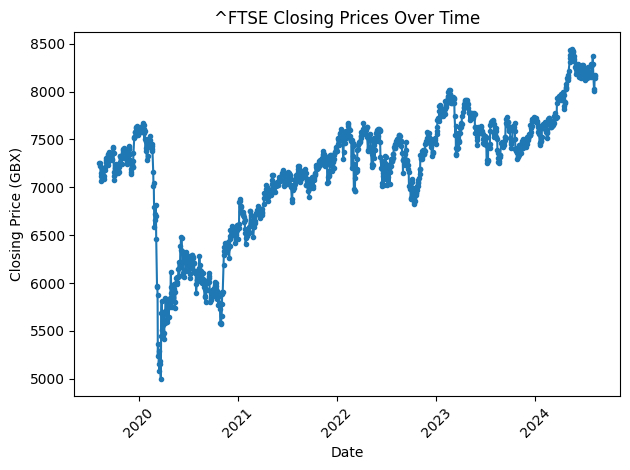

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-09,7285.899902,7297.299805,7237.100098,7253.899902,794807200,0.0,0.0
1,2019-08-12,7253.899902,7305.600098,7207.500000,7226.700195,585461200,0.0,0.0
2,2019-08-13,7226.700195,7281.100098,7166.899902,7250.899902,698409600,0.0,0.0
3,2019-08-14,7250.899902,7268.700195,7112.100098,7147.899902,811517700,0.0,0.0
4,2019-08-15,7147.899902,7148.799805,7020.200195,7067.000000,877816600,0.0,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Inflation,Corrected Close
0,2019-10-01,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0,0.015,7251.526901
1,2019-11-01,7248.399902,7307.200195,7248.399902,7302.399902,582078600,0.0,0.0,0.015,7194.482662
2,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,1670362100,0.0,0.0,0.008,5411.309621
3,2020-05-01,5901.200195,5901.200195,5746.100098,5763.100098,781328900,0.0,0.0,0.005,5734.427958
4,2020-06-01,6076.600098,6179.299805,6076.600098,6166.399902,742112200,0.0,0.0,0.006,6129.622169


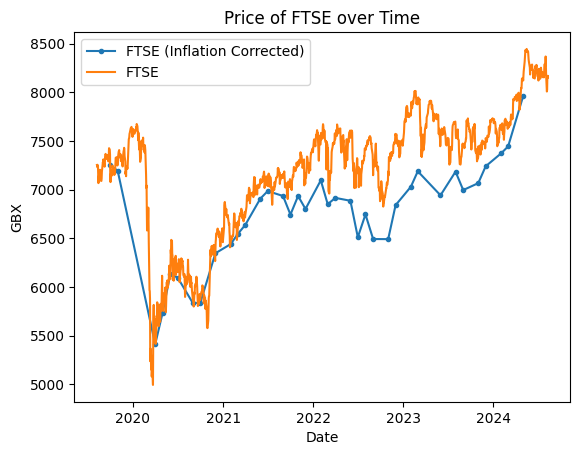

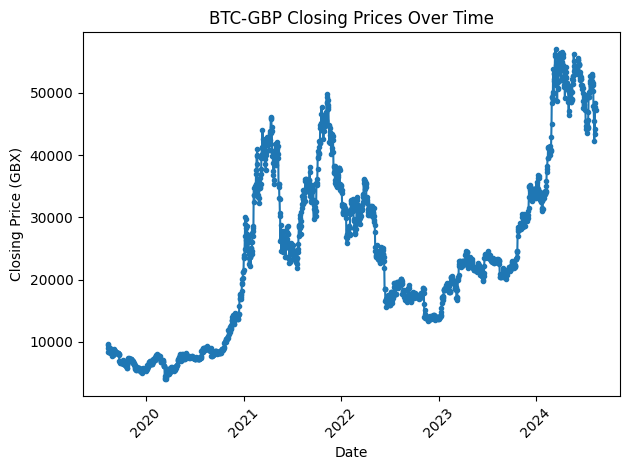

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-11,9428.228516,9585.428711,9343.958984,9585.428711,13121279972,0.0,0.0
1,2019-08-12,9582.231445,9582.231445,9370.578125,9424.601562,11299634484,0.0,0.0
2,2019-08-13,9426.390625,9459.284180,8973.510742,9032.261719,13828382580,0.0,0.0
3,2019-08-14,9026.732422,9027.061523,8315.168945,8334.742188,16576143237,0.0,0.0
4,2019-08-15,8324.040039,8626.843750,7978.304688,8528.679688,18939858084,0.0,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Inflation,Corrected Close
0,2019-09-01,7920.537109,8056.548340,7882.020020,8025.618164,9413438943,0.0,0.0,0.017,7891.463288
1,2019-10-01,6753.657227,6897.457520,6703.517090,6787.889648,12452060072,0.0,0.0,0.015,6687.576008
2,2019-11-01,7105.254883,7167.300293,7045.374512,7156.055176,18795688760,0.0,0.0,0.015,7050.300666
3,2019-12-01,5856.985840,5856.985840,5640.181152,5749.824707,14498458610,0.0,0.0,0.013,5676.036236
4,2020-01-01,5425.667969,5472.485840,5407.095215,5433.849121,14011191757,0.0,0.0,0.018,5337.769274


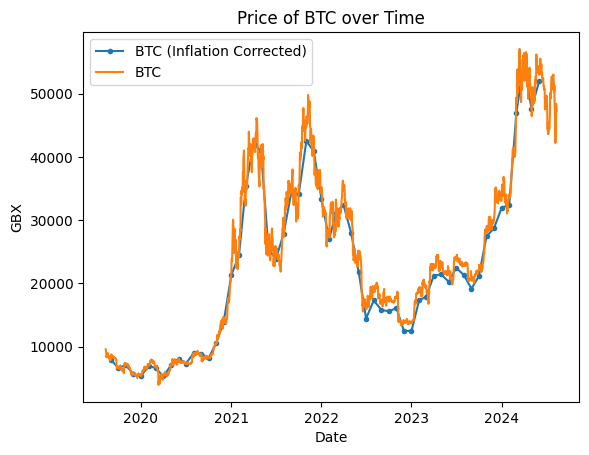

In [55]:
import nbformat
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

def run_notebook(notebook_path):
    with open(notebook_path) as f:
        notebook_content = nbformat.read(f, as_version=4)
    
    # Create an interactive shell
    shell = InteractiveShell.instance()    
    for cell in notebook_content.cells:
        if cell.cell_type == 'code':
            code = cell.source
            shell.run_cell(code)

run_notebook('Q1.ipynb')

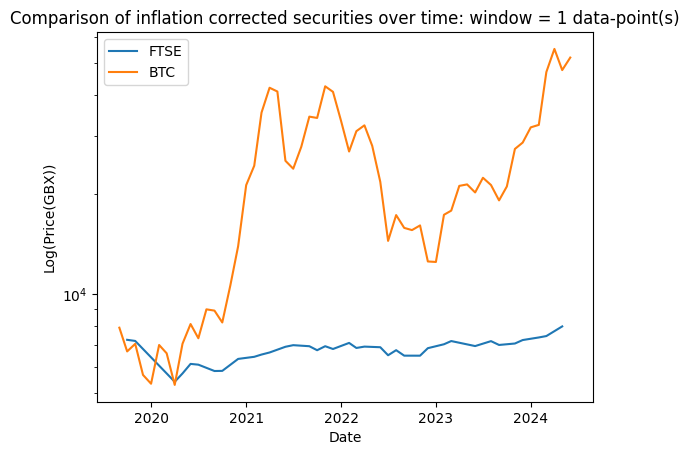

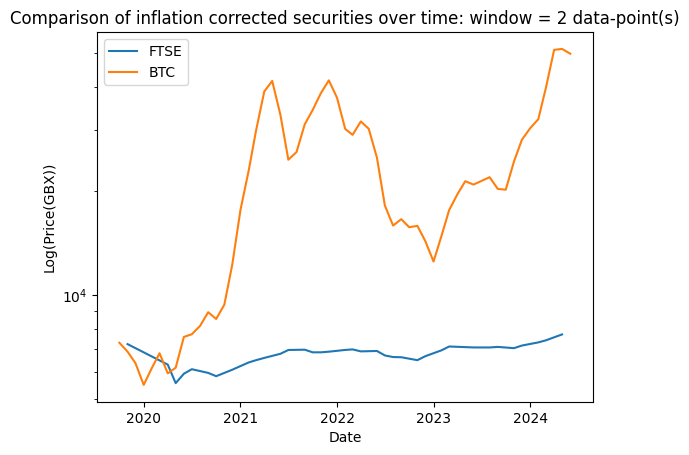

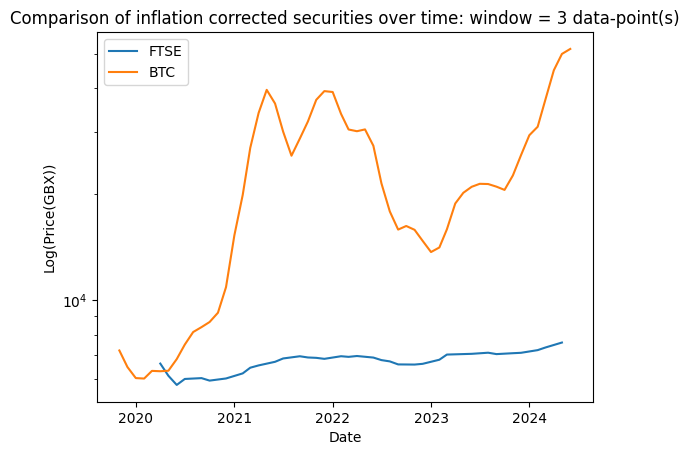

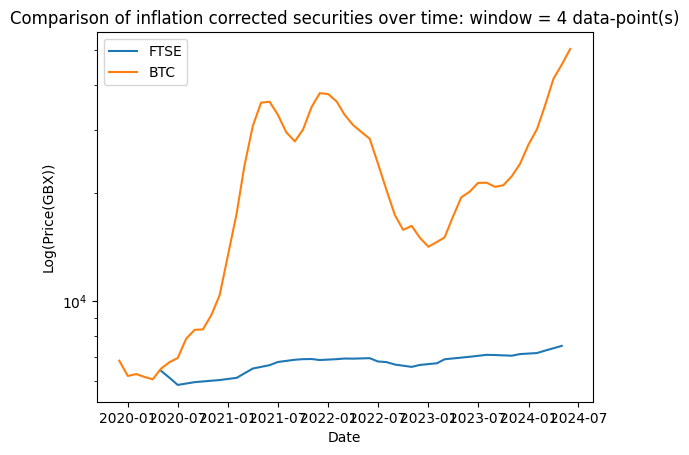

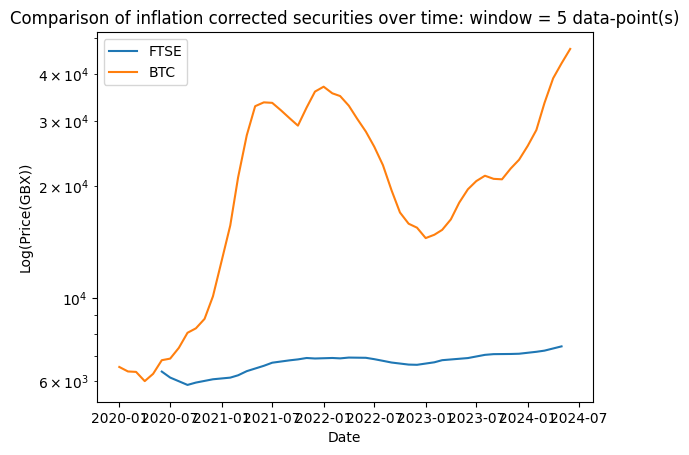

In [56]:
import numpy as np

def PlotRollingAverageComparison(length):
    plt.figure()
    plt.plot(ftse_inflation['Date'], ftse_inflation['Corrected Close'].rolling(window=length).mean())
    plt.plot(btc_inflation['Date'], btc_inflation['Corrected Close'].rolling(window=length).mean())
    plt.yscale('log')
    plt.title(f'Comparison of inflation corrected securities over time: window = {length} data-point(s)')
    plt.legend(['FTSE', 'BTC'])
    plt.xlabel('Date')
    plt.ylabel('Log(Price(GBX))')
    plt.show()

for i in range(1,6):
    PlotRollingAverageComparison(i)

In [78]:
ftse_returns = ftse['Close'].pct_change()
ftse_returns.head(5)

0         NaN
1   -0.003750
2    0.003349
3   -0.014205
4   -0.011318
Name: Close, dtype: float64

In [79]:
expected_returns_ftse = np.mean(ftse_returns)
expected_returns_ftse

np.float64(0.00015557974487081082)

In [85]:
ftse_annual = (1 + expected_returns_ftse)**252 - 1
ftse_annual

np.float64(0.0399816265169286)

In [80]:
volatility_ftse = np.std(ftse_returns)
volatility_ftse

np.float64(0.011043969908420615)

In [81]:
btc_returns = btc['Close'].pct_change()
btc_returns.head(5)

0         NaN
1   -0.016778
2   -0.041629
3   -0.077225
4    0.023269
Name: Close, dtype: float64

In [82]:
expected_returns_btc = np.mean(btc_returns)
expected_returns_btc

np.float64(0.0014387468046115383)

In [86]:
btc_annual = (1 + expected_returns_btc)**252 - 1
btc_annual

np.float64(0.43663507496536846)

In [83]:
volatility_btc = np.std(btc_returns)
volatility_btc

np.float64(0.033351089268569625)